<a href="https://colab.research.google.com/github/radianterk/miniature-giggle/blob/main/Stock_tesla_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Loading the datasets

In [8]:
df=pd.read_csv("/content/TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


## From the first five rows, we can see that data for some of the dates is missing,the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [10]:
df.shape

(2416, 7)

## From this, we got to know that there are 2416 rows of data available and for each row, we have 7 different features or columns.

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


## Performing the EDA of the Tesla Stock Price will tell how prices of the stock have moved over the period of time

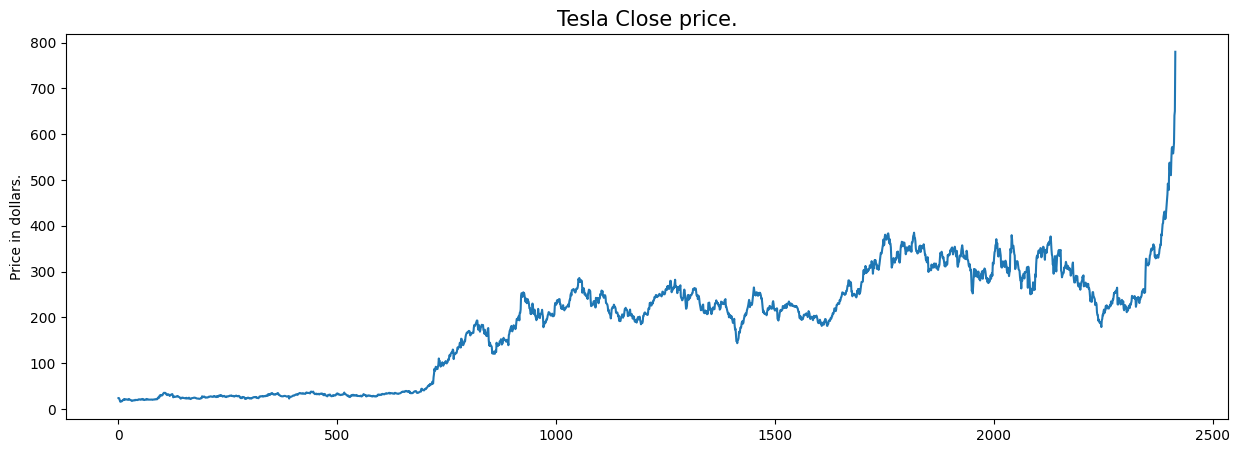

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks

## If observe carefully it can be seen that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [14]:
df[df['Close']==df['Adj Close']].shape

(2416, 7)

## From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having repeated data in the dataset is not going to help so, dropping this column before further analysis.

In [15]:
df=df.drop(['Adj Close'],axis=1)

## Checking for the null values if any are present in the dataset

In [17]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## This implies that there are no null values in the dataset.

<ipython-input-20-cf81b2d6b287>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


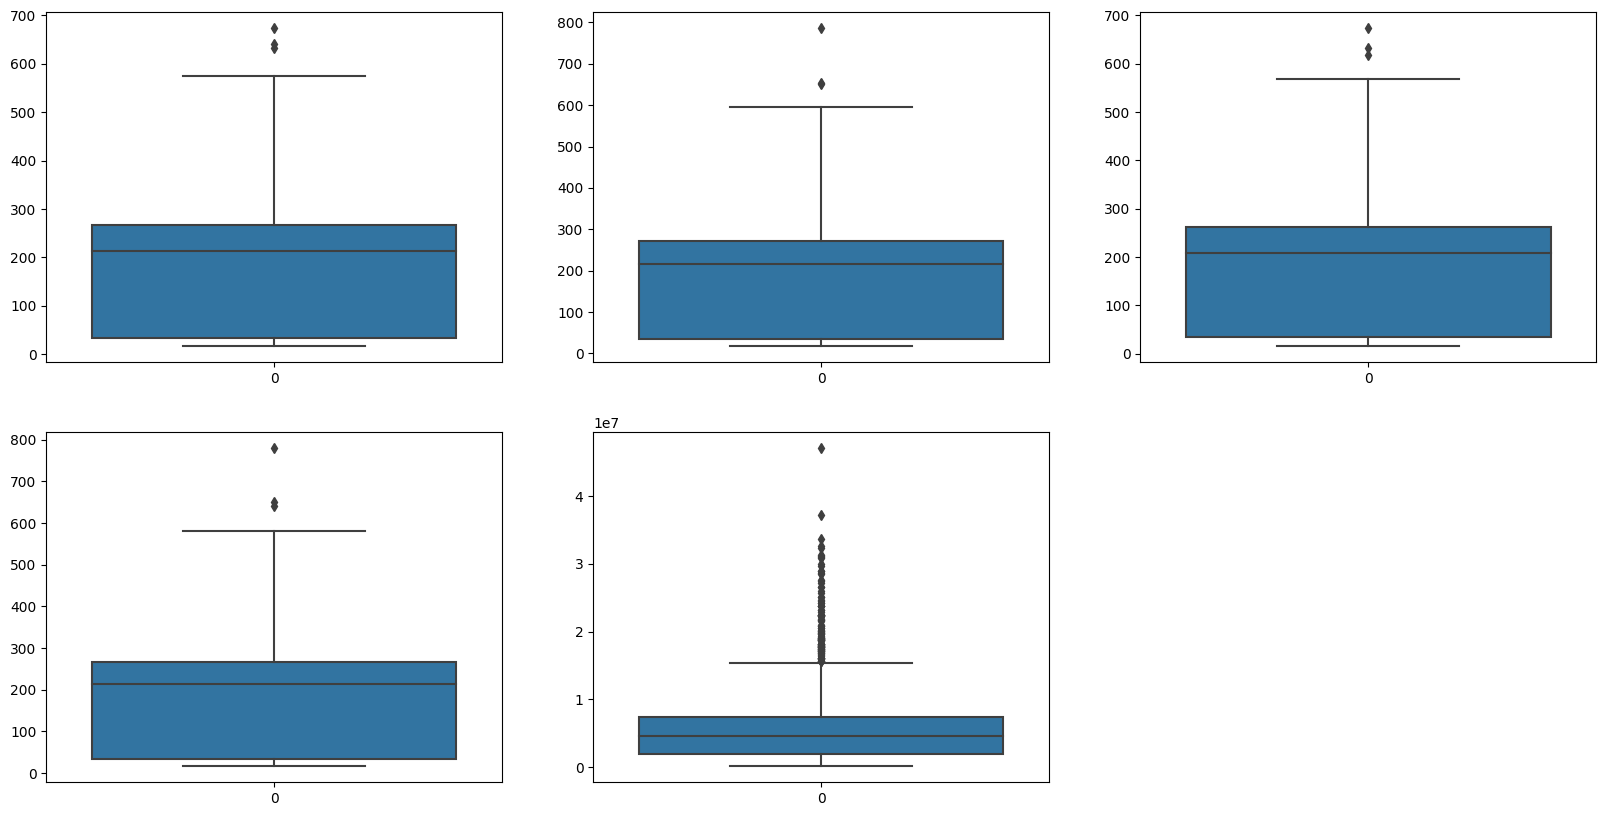

In [20]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

## From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier

## Splitting the date column in day,month and year

In [23]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


### Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column.

In [24]:
df['is_quarter_end']=np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


### As companies publish quartely report to analyze company's performance, so quarter affects the stock prices as well,this can be helpul feature for the learning model

In [25]:
data_grouped = df.groupby('year').mean()
data_grouped

<ipython-input-25-c8d9dcd69246>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()


,Open,High,Low,Close,Volume,day,month,is_quarter_end
year,,,,,,,,
2010,23.408000,24.077231,22.646077,23.341846,1.579762e+06,16.030769,9.453846,0.346154
2011,26.821984,27.380238,26.194167,26.804762,1.290615e+06,15.634921,6.547619,0.345238
2012,31.203120,31.809160,30.545880,31.168600,1.229796e+06,15.776000,6.500000,0.328000
2013,104.416428,106.853016,101.779881,104.401230,8.407722e+06,15.650794,6.543651,0.321429
2014,223.415397,227.449881,219.206111,223.329088,6.913973e+06,15.761905,6.551587,0.337302
2015,229.831944,233.381666,226.270635,230.042898,4.318325e+06,15.750000,6.567460,0.345238
2016,210.058452,213.433492,206.286151,209.767262,4.612546e+06,15.682540,6.555556,0.341270
2017,314.296215,318.450598,309.686972,314.316295,6.334786e+06,15.800797,6.533865,0.338645
2018,317.183466,323.693626,310.552311,317.309921,8.612107e+06,15.796813,6.505976,0.318725


<ipython-input-32-5c9ab5d37a2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


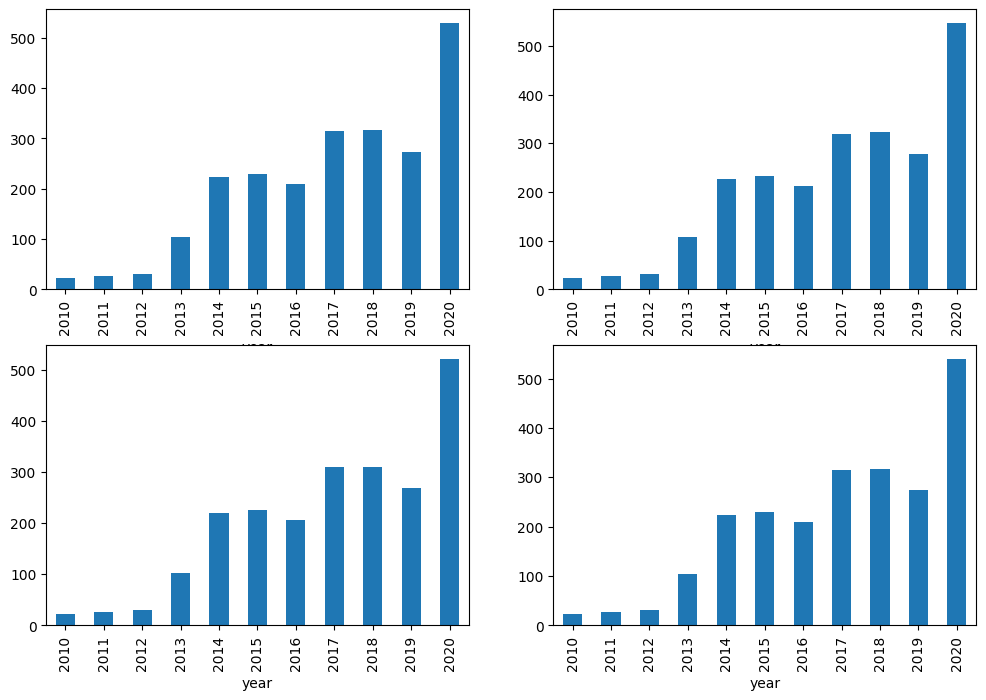

In [32]:
plt.subplots(figsize=(12,8))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

### From the above bar graph, it can be seen that the stock prices have almost doubled from the year 2013 to that in 2014.

In [33]:
df.groupby('is_quarter_end').mean()

<ipython-input-33-8b310a02a10a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


### From above grouped data, we can see that Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
### Also the volume of trades is lower in the months which are quarter end.

In [37]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

### Target feature has been added, which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

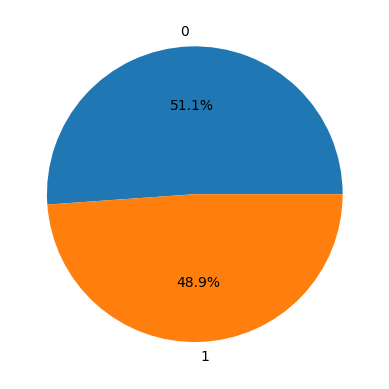

In [38]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

### Visualising the heatmap to see which feature are highly correlated

<ipython-input-39-b77f1df7f533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)


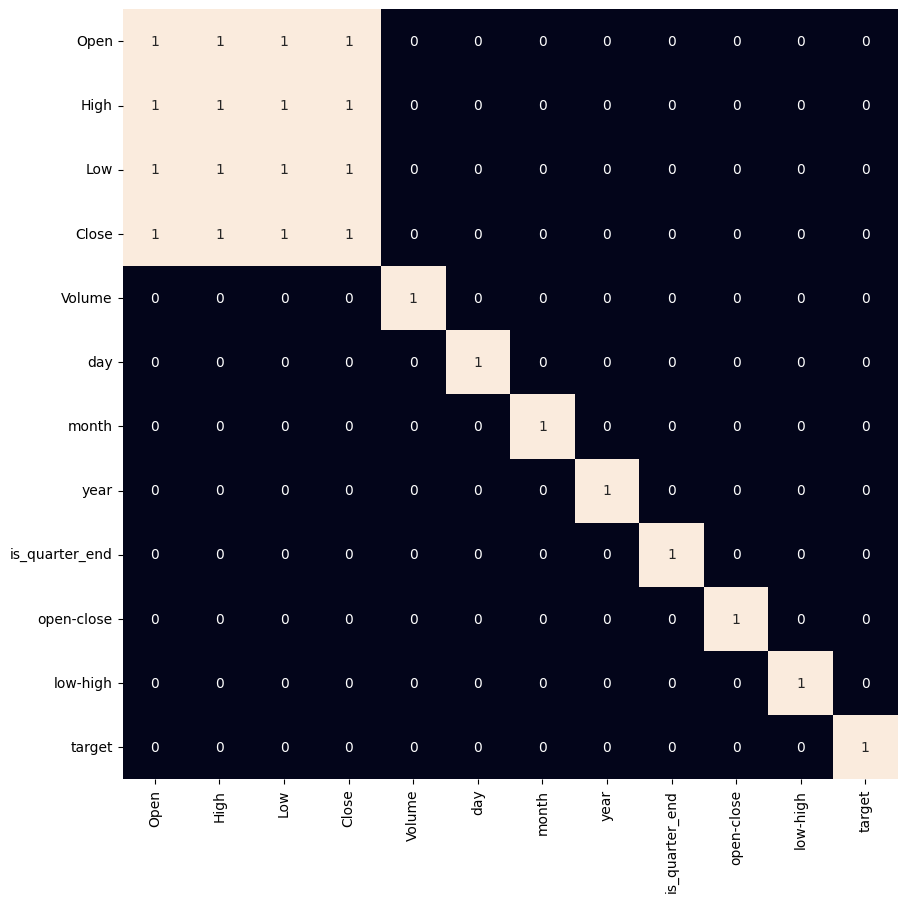

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

### from above heatmap we can see that added features are not highly correlated

## Data splitting and Normalization

In [40]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

In [41]:
sc = StandardScaler()
features = sc.fit_transform(features)

In [42]:
features

array([[ -0.8454838 ,  -0.13789289,   1.42126704],
       [  0.37187202,  -0.07917233,   1.42126704],
       [  0.5638055 ,   0.1747094 ,  -0.70359754],
       ...,
       [ -1.46749327,  -4.52814512,  -0.70359754],
       [ -1.85491311,  -2.38655485,  -0.70359754],
       [-18.86945844, -18.29992269,  -0.70359754]])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2022)
x_train,x_test

(array([[ 0.14795159,  0.46140731, -0.70359754],
        [ 0.08930295,  1.01407344, -0.70359754],
        [-0.79927848, -0.25878973, -0.70359754],
        ...,
        [ 0.0217708 ,  1.02961687,  1.42126704],
        [-0.08308264,  0.52876347,  1.42126704],
        [ 0.79128061, -0.59902315, -0.70359754]]),
 array([[ 0.61534337,  0.18852747,  1.42126704],
        [-0.43140492, -0.14307518, -0.70359754],
        [ 0.99387687, -1.25013505,  1.42126704],
        ...,
        [ 0.15683527,  0.31805888,  1.42126704],
        [-0.18793447,  0.21961362, -0.70359754],
        [ 0.21725877,  0.89144986, -0.70359754]]))

## Model development and Evaluation

### Training on various model like logistic regression,SVM,XGBclassifier, depending on performance, best suited model will be selected

In [47]:
models = [LogisticRegression(),SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(x_train, y_train)

  print(f'{models[i]} : ')

  print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))

  print('Test Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1]))

  print()


LogisticRegression() : 
Training Accuracy :  0.52896820463577
Test Accuracy :  0.4801642527017508

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5285850698537765
Test Accuracy :  0.49622012611033794

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.96842

### Among the three models,XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the test accuracy is too high. But in the case of the Logistic Regression, this is not the case.

## Confusion Matrix

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr.predict(x_test))
cm

array([[ 69, 154],
       [ 89, 172]])

## Conclusion
#### Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction